# Importing Libraries

In [439]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

import pickle

# Importing dataset

In [2]:
df = pd.read_csv('Preprocessed_data.csv')
df

,age,new_education,new_workclass_Local-gov,new_workclass_Never-worked,new_workclass_Private,new_workclass_Self-emp-inc,new_workclass_Self-emp-not-inc,new_workclass_State-gov,new_workclass_Without-pay,new_occupation_Armed-Forces,...,new_occupation_Priv-house-serv,new_occupation_Prof-specialty,new_occupation_Protective-serv,new_occupation_Sales,new_occupation_Tech-support,new_occupation_Transport-moving,capital-gain,capital-loss,hours-per-week,target
0,0.301370,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021740,0.0,-0.035429,0
1,0.452055,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-2.222153,0
2,0.287671,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.035429,0
3,0.493151,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.035429,0
4,0.150685,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,-0.197409,0
32557,0.315068,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.035429,1
32558,0.561644,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.035429,0
32559,0.068493,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-1.655225,0


# Train test split

In [3]:
x = df.drop(['target'], axis = 'columns')

In [4]:
y = df.target

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [6]:
X_train.shape, X_test.shape

((22792, 25), (9769, 25))

# Model Building

Our objective revolves around predicting whether an individual's salary will surpass the threshold of $50,000 or not, constituting a binary classification problem. In tackling this task, we will employ various classification models to enhance the accuracy and reliability of our predictions.

Following is the list of the classification models with which we will be dealing:

1. Logistic Regression
2. Decision Tree classifier
3. Random Forest Classifier
4. Support Vector Machines (SVM) classifier
5. k-Nearest Neighbors (k-NN) Classifier
6. Naive Bayes Classifier
7. XGboost classifier
8. LightGBM Classfier
9. AdaBoost Classifier
10. KMeans Classifier


## Logistic Regression

`Logistic Regression is a binary classification algorithm used to predict the probability of an event occurring. It models the relationship between independent variables and the log-odds of the dependent variable, applying the logistic function to constrain the output between 0 and 1. This facilitates interpreting the results as probabilities, making it a fundamental tool in predictive modeling and statistical analysis.`

In [75]:
Log_M = LogisticRegression(max_iter = 300)

Information about Parameter :-   

1. **max_iter** :-  `Maximum number of iterations for logistic regression convergence.`

In [76]:
Log_M.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [77]:
Log_Model_score = (Log_M.score(X_test, Y_test)*100).round(2)
Log_Model_score

81.74

In [78]:
predicted_log_model = Log_M.predict(X_test)

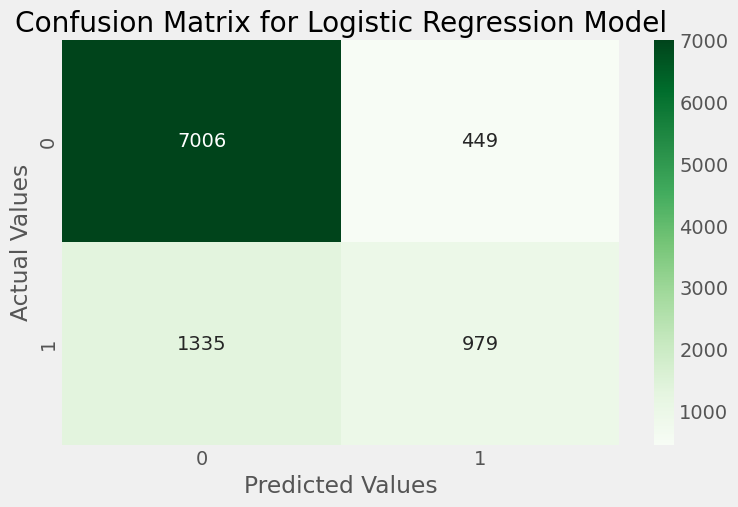

In [157]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, predicted_log_model)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()


## Decision Tree classifier

`A Decision Tree classifier is a machine learning algorithm that recursively partitions data based on feature attributes, creating a tree-like structure of decision nodes. Each node represents a feature test, leading to further nodes or leaf nodes containing class predictions. It efficiently handles both categorical and numerical data, providing a transparent and interpretable model for classification tasks.`

In [146]:
Dec_M = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 11,
                               min_samples_split = 5,
                               min_samples_leaf = 3)

Information about Parameter :-

1. **criterion** :- `The function to measure the quality of a split.`

2. **max_depth** :- `The strategy used to choose the split at each node.`  

3. **min_samples_split** :- `The maximum depth of the tree.`   

4. **min_samples_leaf** :- `The minimum number of samples required to split an internal node.`


In [149]:
Dec_M.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=5)

In [150]:
Dec_M_score = (Dec_M.score(X_test, Y_test)*100).round(2)
Dec_M_score

83.56

In [151]:
Dec_M_predict = Dec_M.predict(X_test)

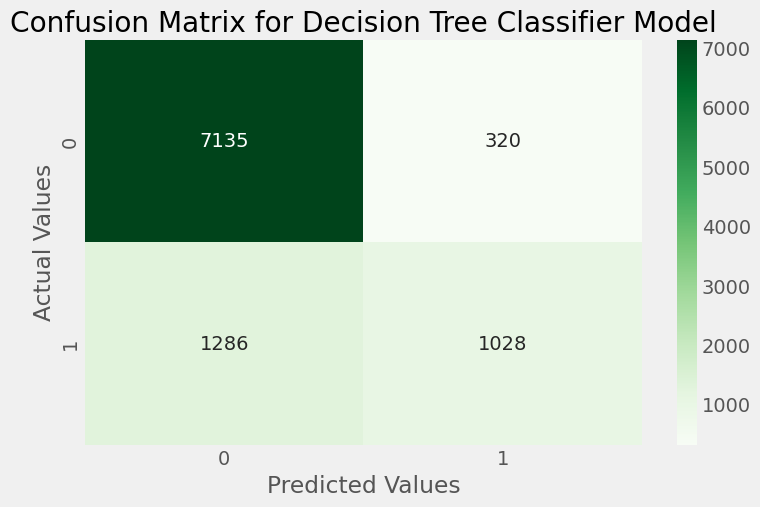

In [158]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, Dec_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for Decision Tree Classifier Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## Random Forest Classifier

`Random Forest Classifier is an ensemble learning method that constructs multiple decision trees during training. It combines their predictions to improve overall accuracy and mitigate overfitting. The algorithm introduces randomness by selecting a random subset of features for each tree and averaging their outputs, resulting in a robust and highly accurate classification model for a variety of datasets.`

In [254]:
Ran_M = RandomForestClassifier(n_estimators = 315,
                               criterion = 'log_loss',
                               max_depth = 10)

Information about parameters -

1. **n_estimators** :- `The number of trees in the forest.`  

2. **criterion** :- `The function to measure the quality of a split.`

3. **max_depth** :- `The maximum depth of the tree.`

In [257]:
Ran_M.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=315)

In [258]:
Ran_M_score = (Ran_M.score(X_test, Y_test)*100).round(2)
Ran_M_score

84.07

In [259]:
Ran_M_predict = Ran_M.predict(X_test)

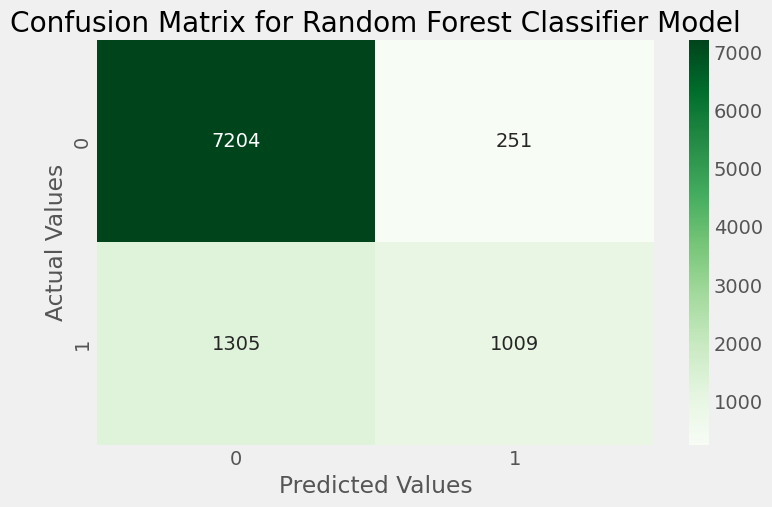

In [260]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, Ran_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## Support Vector Machines (SVM) classifier

`Support Vector Machines (SVM) is a powerful classification algorithm that identifies an optimal hyperplane to separate different classes in a high-dimensional space. It aims to maximize the margin between classes, defining support vectors as crucial data points. SVM is effective for both linear and non-linear classification tasks, employing kernel functions to map data into higher dimensions for improved separation.`

In [295]:
svm_M = SVC(kernel = 'linear')

Information about parameter :-    

1. **Kernel** :- `Specifies the kernel type to be used in the algorithm.`

In [296]:
svm_M.fit(X_train, Y_train)

SVC(kernel='linear')

In [297]:
svm_M_score = (svm_M.score(X_test, Y_test)*100).round(2)
svm_M_score

81.74

In [298]:
svm_M_predict = svm_M.predict(X_test)

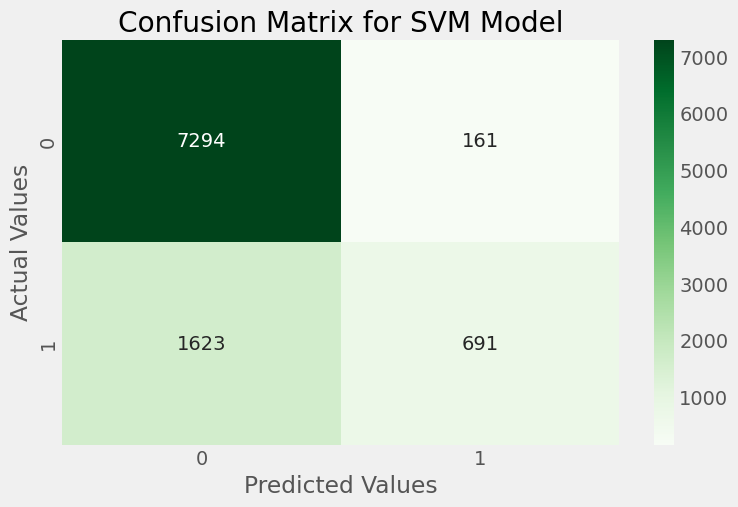

In [299]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, svm_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for SVM Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## k-Nearest Neighbors (k-NN) Classifier

`k-Nearest Neighbors (k-NN) is a simple classification algorithm that predicts the class of a data point based on the majority class of its k nearest neighbors in the feature space. The distance metric determines proximity, and the class with the most occurrences among neighbors influences the prediction. It's non-parametric and relies on local patterns in the data.`

In [341]:
knn_M = KNeighborsClassifier(n_neighbors = 20)

In [342]:
knn_M.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [343]:
knn_M_score = (knn_M.score(X_test, Y_test) * 100).round(2)
knn_M_score

80.56

In [344]:
knn_M_predict = knn_M.predict(X_test)

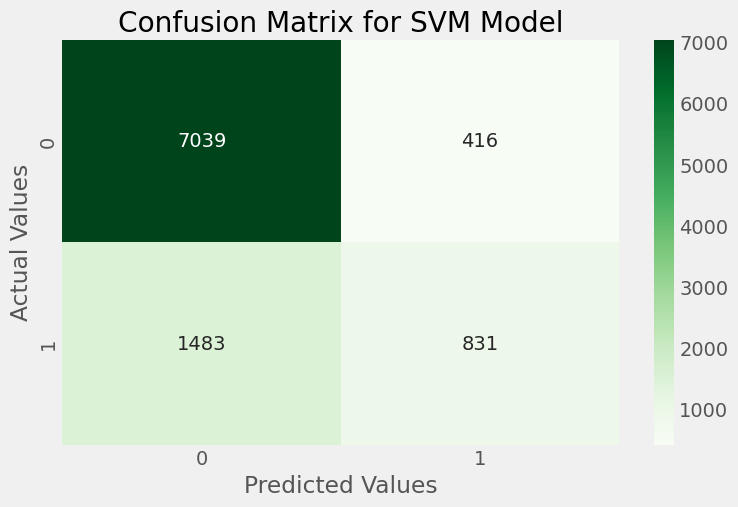

In [345]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, knn_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for SVM Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## XGboost classifier

`XGBoost is a powerful and efficient gradient boosting algorithm for classification. It builds an ensemble of decision trees sequentially, optimizing for predictive accuracy. XGBoost incorporates regularization techniques, handles missing data, and offers parallel computation for speed. Its success in various machine learning competitions underscores its effectiveness, making it a popular choice for accurate and robust classification tasks.`

In [403]:
xg_M = XGBClassifier(learning_rate = 0.3,
                     criterion = 'squared_error')

In [404]:
xg_M.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:54:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='squared_error', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [405]:
xg_M_score = (xg_M.score(X_test, Y_test)*100).round(2)
xg_M_score

84.93

In [406]:
xg_M_predict = xg_M.predict(X_test)

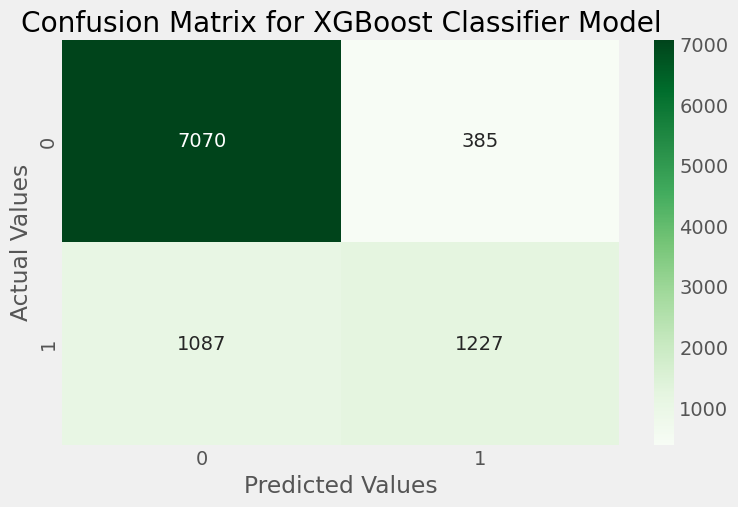

In [407]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, xg_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for XGBoost Classifier Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## Naive Bayes (Bernoulli NB)

`Bernoulli Naive Bayes is a probabilistic classifier suitable for binary feature data. It models features as binary indicators of presence or absence, assuming independence between features. It's effective for text classification tasks where features represent word occurrences, and it's implemented in scikit-learn as BernoulliNB.`

In [433]:
nb_M = BernoulliNB()

In [434]:
nb_M.fit(X_train, Y_train)

BernoulliNB()

In [435]:
nb_M_score = (nb_M.score(X_test, Y_test) * 100).round(2)
nb_M_score

79.15

In [436]:
nb_M_predict = nb_M.predict(X_test)


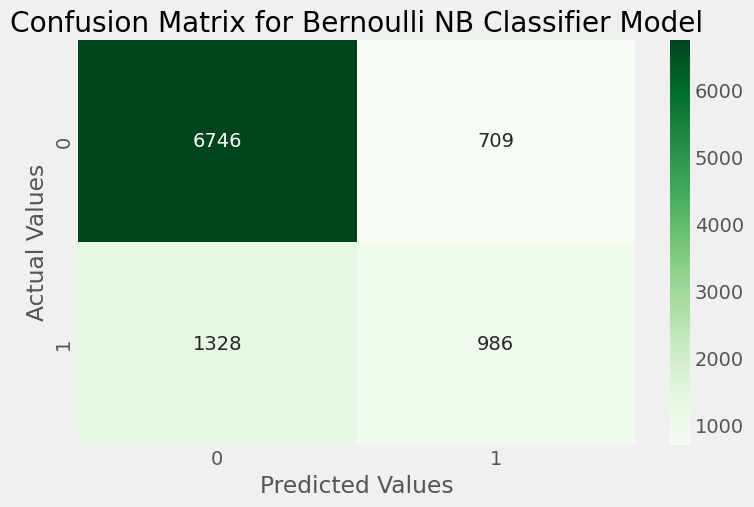

In [426]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (8, 5))

cm = confusion_matrix(Y_test, nb_M_predict)

sn.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')

plt.title("Confusion Matrix for Bernoulli NB Classifier Model")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

# Comparing Models

In [437]:
Model_name = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
              'SVM', 'KNeighbors Classifier', 'XGBoost Classifier', 'Bernoulli NB Classifier']

Model_score = [Log_Model_score, Dec_M_score, Ran_M_score, svm_M_score, knn_M_score,
               xg_M_score, nb_M_score]

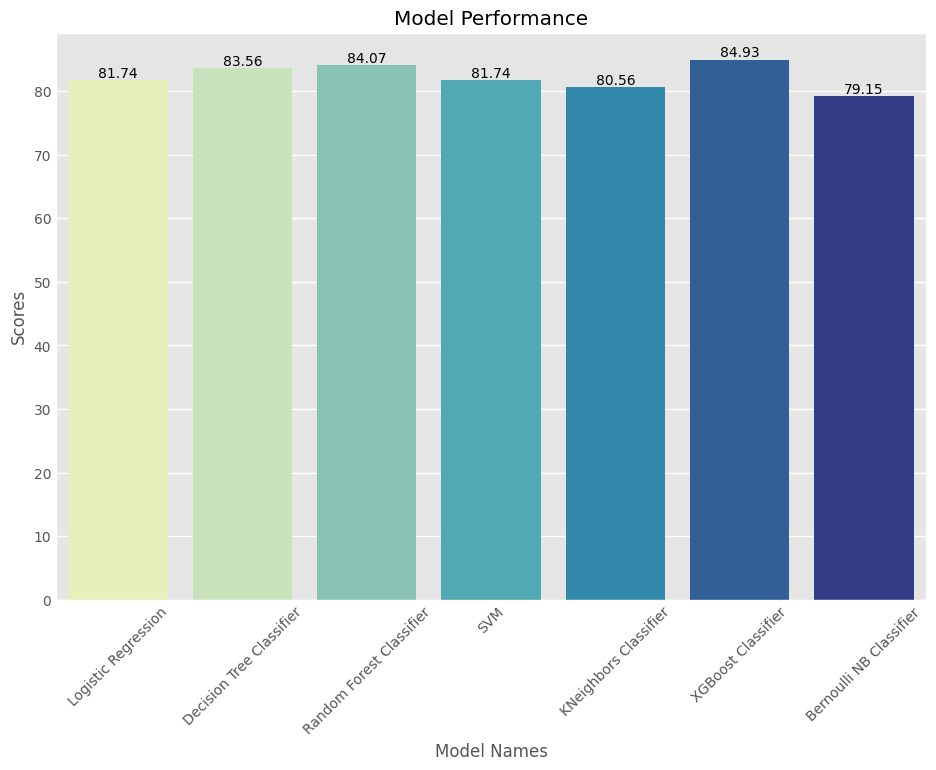

In [438]:
plt.style.use('ggplot')

plt.figure(figsize = (10, 7))

sn.barplot(x = Model_name,
           y = Model_score,
           hue = Model_name,
           palette = 'YlGnBu')

plt.title("Model Performance")
plt.ylabel("Scores")
plt.xlabel("Model Names")

for i in range(len(Model_name)):
  plt.text(i, Model_score[i], Model_score[i], ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)

plt.show()

Based on the observed performance, we've selected the XGBoost Classifier as our model of choice for deployment, given its highest score.

# Saving Model

In [440]:
with open('model_pickle', 'wb') as f:
  pickle.dump(xg_M, f)
